# Différentiation numérique

On veut calculer l'erreur qu'on fait en calculant la dérivée en utilisant un taux d'accroissement. Pour cela on peut utiliser le théorème de Taylor-Lagrange et on peut en conclure l'inégalité suivante:
$ e_approx (h) =< \frac{h}{2}M_2

Taux d'acc : 1.0517091807564771 pour h = 0.1
Taux d'acc : 1.0050167084167949 pour h = 0.01
Taux d'acc : 1.0005001667083846 pour h = 0.001
Taux d'acc : 1.0000500016671410 pour h = 0.0001
Taux d'acc : 1.0000050000069649 pour h = 1e-05
Taux d'acc : 1.0000004999621837 pour h = 1e-06
Taux d'acc : 1.0000000494336803 pour h = 1e-07
Taux d'acc : 0.9999999939225290 pour h = 1e-08
Taux d'acc : 1.0000000827403710 pour h = 1e-09
Taux d'acc : 1.0000000827403710 pour h = 1e-10
Taux d'acc : 1.0000000827403710 pour h = 1e-11
Taux d'acc : 1.0000889005823410 pour h = 1e-12
Taux d'acc : 0.9992007221626409 pour h = 1e-13
Taux d'acc : 0.9992007221626409 pour h = 1e-14
Taux d'acc : 1.1102230246251565 pour h = 1e-15
Taux d'acc : 0.0000000000000000 pour h = 1e-16
Taux d'acc : 0.0000000000000000 pour h = 1e-17
Taux d'acc : 0.0000000000000000 pour h = 1e-18
Err. = -0.0517092 pour h = 0.1
Err. = -0.00501671 pour h = 0.01
Err. = -0.000500167 pour h = 0.001
Err. = -5.00017E-05 pour h = 0.0001
Err. = -5.00001E-06 p

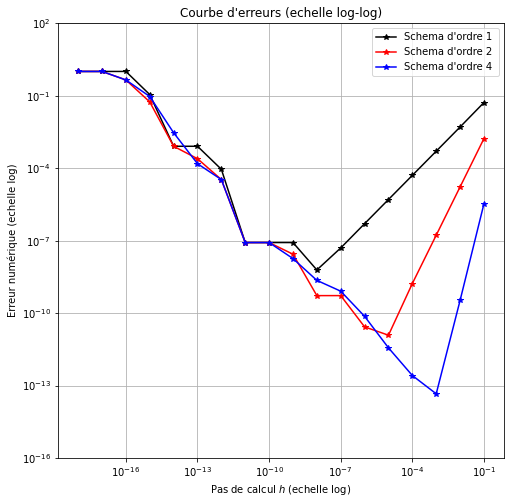

In [4]:
import numpy as np
from numpy import exp, sin, cos, tan, pi
import matplotlib.pyplot as plt 

#2.3 Premiers tests numériques.

f = lambda x : np.exp(x)
x0 = 0
pmax = 18
ta = np.zeros(pmax)
tc = np.zeros(pmax)
tk = np.zeros(pmax)
for p in range(1, pmax + 1):
    h = 10**(-p)
    ta[p-1] = (f(x0+h) - f(x0))/h
    tc[p-1] = (f(x0+h) - f(x0-h))/(2*h)
    tk[p-1] = (-f(x0+2*h) + 8*f(x0+h) - 8*f(x0-h) + f(x0-2*h))/(12*h)
    print("Taux d'acc : {:.16F} pour h = {}".format(ta[p - 1], h))

valex = np.exp(x0)
err = np.zeros(pmax)
err2 = np.zeros(pmax)
err3 = np.zeros(pmax)
for p in range(1, pmax + 1):
    h = 10**(-p)
    err[p-1] = valex - ta[p-1]
    err2[p-1] = valex - tc[p-1]
    err3[p-1] = valex - tk[p-1]
    print("Err. = {:G} pour h = {}".format(err[p-1], h))

fig, ax = plt.subplots(figsize = (8,8))
h = [10**(-p) for p in range(1, pmax + 1)]
ax.plot(h, abs(err), "-*k", label = "Schema d'ordre 1")
ax.plot(h, abs(err2), "-*r", label = "Schema d'ordre 2")
ax.plot(h, abs(err3), "-*b", label = "Schema d'ordre 4 ")
lim = (10**(-16), 10**2)
ax.set_ylim(lim)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Pas de calcul $h$ (echelle log)")
ax.set_ylabel("Erreur numérique (echelle log)")
ax.set_title("Courbe d'erreurs (echelle log-log)")
plt.legend()
plt.grid()
plt.show()
